# **Student Percentage Prediction**
> # Task 1: ``Prediction Using Unsupervised ML``
> ### Author: ``Kunwardeep Singh Jagdev``
> ## Task Goals: ``What will be the predicted score if a student studies for 9.25hrs/day``


## **Importing the necessary libraries and the dataset**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
## Importing the dataset
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

data_df = pd.read_csv(url)

In [3]:
data_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Converting column headers into lowercase
data_df.columns = map(str.lower, data_df.columns)

# **Analysing the dataset**

> Plotting a hours vs scores scatter plot to obtain an overview of the data to manually identify any relationships between the two variables.

In [5]:
hours_vs_scores_scatter_plot = px.scatter(data_frame= data_df, y= 'scores', x= "hours", color= 'hours')
hours_vs_scores_scatter_plot.update_traces(marker= dict(size = 9))
hours_vs_scores_scatter_plot.update_layout(title= "Hours Studied VS Percentage Obtained", xaxis_title= "Hours Studied(hr)", yaxis_title= "Percentage Obtained", font = dict(size = 14))

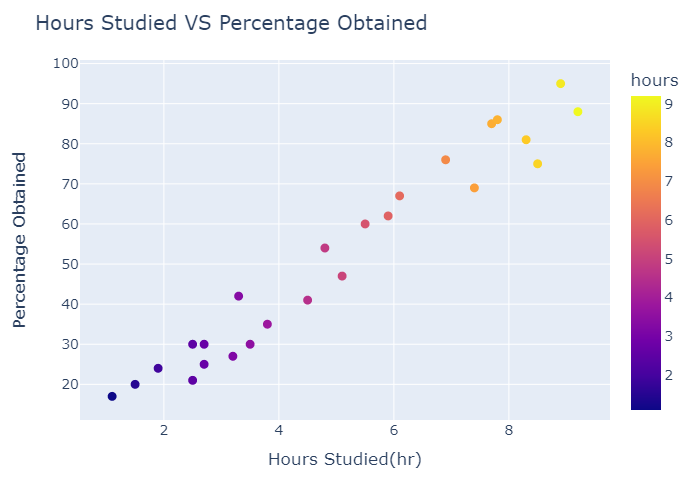

In [6]:
hours_vs_scores_scatter_plot.show("png")

In [7]:
# Calculating the correlation coefficient
corr_coef = data_df.hours.corr(data_df.scores)

> From the graph, we can infer that it is very evident that a positive correlation of 0.9761906560220885 is present between the two variables i.e Percentage Obtained(scores) & Hours Studied(hours).

# **Preparing the Data for Machine Learning**

> The next step is to divide the dataset into attributs(inputs) and labels(outputs).

In [8]:
attributes = data_df.hours.values
labels = data_df.scores.values

In [9]:
# the shape of attributes as well as labels is (25, 0) which is not desireable, hence we need to use the np.reshape() function to reshape the arrays into (25,1)
attributes = np.reshape(attributes, (25,1))
labels = np.reshape(labels, (25,1))

> Using the attributs and labels, we can split our dataset into training and test set using the Scikit-Learn's built-in train_test_split() method.  
> 
> Splitting the data into training and testing set is an important part of evaluating data mining models. Typically, when we separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing.

In [10]:
from sklearn.model_selection import train_test_split  
attributes_train, attributes_test, labels_train, labels_test = train_test_split(attributes, labels, test_size=0.2, random_state=0) 

# **Training the Algorithim**

> In this step, we'll use the Scikit-Learn's built-in LinearRegression method to train our algorithim.

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(attributes_train, labels_train) 

print("Training has completed sucessfully.")

Training has completed sucessfully.


Text(0.5, 1.0, 'Hours VS Percentage')

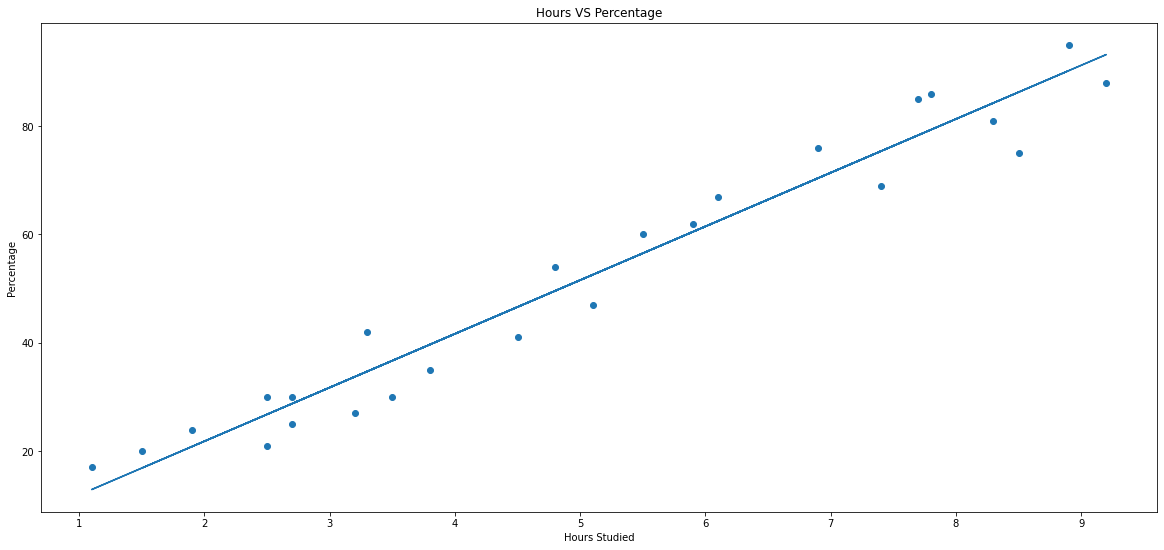

In [12]:
# Plotting the regression line
line = regressor.coef_*attributes+regressor.intercept_

# Plotting for the test data

plt.figure(figsize = (20,9))
plt.scatter(attributes, labels, )
plt.plot(attributes, line)
plt.ylabel("Percentage")
plt.xlabel("Hours Studied")
plt.title("Hours VS Percentage")



# **Predicting result using our trained algorithim**

> Now that our algorithim is trained, we can make some predictions.

In [13]:
prdct_labels = regressor.predict(attributes_test)

In [14]:
# Comaparing our predicted data by actual data
actual_vs_prdct_df = pd.DataFrame({"Actual" : np.reshape(labels_test, (5)), "Predicted": np.reshape(prdct_labels, (5))})
actual_vs_prdct_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **Solving Task Goals**

In [15]:
hours = 9.25
goal_prdct = regressor.predict(np.reshape(hours, (-1, 1)))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(str(goal_prdct).strip("[]")))

No of Hours = 9.25
Predicted Score = 93.69173249


# **Evaluating the model:**

> The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(labels_test, prdct_labels)) 

Mean Absolute Error: 4.183859899002982
